<a href="https://colab.research.google.com/github/Eunjung-Cho/Overwatch-League-Prediction/blob/main/eda/%EC%98%A4%EB%B2%84%EC%9B%8C%EC%B9%98_%ED%8F%AC%EC%A7%80%EC%85%98%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오버워치 포지션_서포터 EDA


## 데이터 조정

### 필요한 패키지

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### 사용한 데이터

phs_p : 2018~2021년 오버워치 리그 데이터

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/개인프로젝트/클라우드플랫폼/phs_p.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,start_time,match_id,stage,map_type,map_name,player,team,stat_name,hero,stat_amount,tournament_title,position
0,7/12/2018 0:19,13121,Overwatch League Inaugural Season Championship,PAYLOAD,Dorado,Gamsu,Boston Uprising,All Damage Done,All Heroes,10677.179340,NaN,Any
1,7/12/2018 0:19,13121,Overwatch League Inaugural Season Championship,PAYLOAD,Dorado,Gamsu,Boston Uprising,Assists,All Heroes,10.000000,NaN,Any
2,7/12/2018 0:19,13121,Overwatch League Inaugural Season Championship,PAYLOAD,Dorado,Gamsu,Boston Uprising,Average Time Alive,All Heroes,60.004185,NaN,Any
3,7/12/2018 0:19,13121,Overwatch League Inaugural Season Championship,PAYLOAD,Dorado,Gamsu,Boston Uprising,Barrier Damage Done,All Heroes,4868.578228,NaN,Any
4,7/12/2018 0:19,13121,Overwatch League Inaugural Season Championship,PAYLOAD,Dorado,Gamsu,Boston Uprising,Damage - Quick Melee,All Heroes,304.000000,NaN,Any


In [ ]:
herolist = df['hero'].values.tolist()
heroset = set(herolist) 
heroset

{'All Heroes',
 'Ana',
 'Ashe',
 'Baptiste',
 'Bastion',
 'Brigitte',
 'D.Va',
 'Doomfist',
 'Echo',
 'Genji',
 'Hanzo',
 'Junkrat',
 'Lúcio',
 'McCree',
 'Mei',
 'Mercy',
 'Moira',
 'Orisa',
 'Pharah',
 'Reaper',
 'Reinhardt',
 'Roadhog',
 'Sigma',
 'Soldier: 76',
 'Sombra',
 'Symmetra',
 'Torbjörn',
 'Tracer',
 'Widowmaker',
 'Winston',
 'Wrecking Ball',
 'Zarya',
 'Zenyatta',
 nan}

### 포지션 열 추가

In [ ]:
hero_dict  = { 'tanker' : ['D.Va', 'Reinhardt', 'Roadhog', 'Sigma',  'Winston', 
                          'Wrecking Ball', 'Zarya', 'Orisa' ],
'dps' : ['Ashe','Bastion','Doomfist', 'Genji', 'Hanzo', 'Junkrat','McCree', 
       'Mei','Pharah', 'Reaper','Soldier: 76', 'Sombra', 'Symmetra', 'Torbjörn', 
           'Tracer', 'Widowmaker', 'Echo'],
'supporter' : [ 'Zenyatta','Mercy', 'Moira','Lúcio','Ana','Brigitte','Baptiste'],
'Any':'All Heroes'}

In [ ]:
position_dict = {}
for key,val in hero_dict.items():
    if key != 'Any':
        for v in val:
            position_dict[v] = key
    else:
        position_dict[val] = key
print(position_dict)
print(len(position_dict))

{'D.Va': 'tanker', 'Reinhardt': 'tanker', 'Roadhog': 'tanker', 'Sigma': 'tanker', 'Winston': 'tanker', 'Wrecking Ball': 'tanker', 'Zarya': 'tanker', 'Orisa': 'tanker', 'Ashe': 'dps', 'Bastion': 'dps', 'Doomfist': 'dps', 'Genji': 'dps', 'Hanzo': 'dps', 'Junkrat': 'dps', 'McCree': 'dps', 'Mei': 'dps', 'Pharah': 'dps', 'Reaper': 'dps', 'Soldier: 76': 'dps', 'Sombra': 'dps', 'Symmetra': 'dps', 'Torbjörn': 'dps', 'Tracer': 'dps', 'Widowmaker': 'dps', 'Echo': 'dps', 'Zenyatta': 'supporter', 'Mercy': 'supporter', 'Moira': 'supporter', 'Lúcio': 'supporter', 'Ana': 'supporter', 'Brigitte': 'supporter', 'Baptiste': 'supporter', 'All Heroes': 'Any'}
33


In [ ]:
position = []
for hero in df['hero']:
    try:
        position.append(position_dict[hero])
    except KeyError:
        position.append(None)

In [ ]:
df['position'] = position

In [ ]:
df['position'].value_counts()

Any          1091841
supporter    1017428
tanker       1007461
dps           976622
Name: position, dtype: int64

In [ ]:
df.head()

,start_time,match_id,stage,map_type,map_name,player,team,stat_name,hero,stat_amount,tournament_title,position
0,7/12/2018 0:19,13121,Overwatch League Inaugural Season Championship,PAYLOAD,Dorado,Gamsu,Boston Uprising,All Damage Done,All Heroes,10677.179340,NaN,Any
1,7/12/2018 0:19,13121,Overwatch League Inaugural Season Championship,PAYLOAD,Dorado,Gamsu,Boston Uprising,Assists,All Heroes,10.000000,NaN,Any
2,7/12/2018 0:19,13121,Overwatch League Inaugural Season Championship,PAYLOAD,Dorado,Gamsu,Boston Uprising,Average Time Alive,All Heroes,60.004185,NaN,Any
3,7/12/2018 0:19,13121,Overwatch League Inaugural Season Championship,PAYLOAD,Dorado,Gamsu,Boston Uprising,Barrier Damage Done,All Heroes,4868.578228,NaN,Any
4,7/12/2018 0:19,13121,Overwatch League Inaugural Season Championship,PAYLOAD,Dorado,Gamsu,Boston Uprising,Damage - Quick Melee,All Heroes,304.000000,NaN,Any


### 각 포지션 스킬 구분_ 서포터

In [ ]:
tanker_skill = set(df[df['position']=='tanker']['stat_name'])
dps_skill = set(df[df['position']=='dps']['stat_name'])
supporter_skill = set(df[df['position']=='supporter']['stat_name'])

In [ ]:
len(tanker_skill & dps_skill & supporter_skill)

51

In [ ]:
common_skill = tanker_skill & dps_skill & supporter_skill

In [ ]:
len(supporter_skill)

133

In [ ]:
len(supporter_skill - common_skill)

82

In [ ]:
print(supporter_skill - common_skill)

{'Sound Barrier Efficiency', 'Players Resurrected', 'Biotic Orb Maximum Healing', 'Unscoped Shots', 'Soundwave Kills', 'Nano Boost Assists', 'Armor - Repair Pack', 'Amplification Matrix Efficiency', 'Nano Boosts Applied', 'Healing Amplified', 'Armor - Rally', 'Healing - Transcendence', 'Healing - Secondary Fire', 'Healing - Healing Boost Amped', 'Healing - Weapon Valkyrie', 'Biotic Launcher Healing Explosions', 'Players Saved', 'Transcendence Efficiency', 'Coalesence - Healing per Use', 'Healing - Regenerative Burst', 'Scoped Shots', 'Amplification Matrix Casts', 'Sound Barriers Provided', 'Unscoped Accuracy', 'Secondary Fire Ticks', 'Speed Song Time Elapsed', 'Blaster Kills', 'Immortality Field Deaths Prevented', 'Biotic Launcher Healing Shots', 'Transcendence Healing', 'Scoped Hits', 'Healing Done', 'Damage - Weapon Charged', 'Healing - Coalescence', 'Coalescence Healing', 'Biotic Orb Healing Efficiency', 'Biotic Orb Maximum Damage', 'Sound Barrier Casts', 'Scoped Accuracy', 'Armor P

### 서포터행만 추리기

In [ ]:
supporter = df['position'] == 'supporter'
df_s = df[supporter]
df_s

,start_time,match_id,stage,map_type,map_name,player,team,stat_name,hero,stat_amount,tournament_title,position
120,7/12/2018 0:19,13121,Overwatch League Inaugural Season Championship,PAYLOAD,Dorado,Kellex,Boston Uprising,Amped Speed Activations,Lúcio,3.000000,NaN,supporter
121,7/12/2018 0:19,13121,Overwatch League Inaugural Season Championship,PAYLOAD,Dorado,Kellex,Boston Uprising,Average Time Alive,Lúcio,6.366000,NaN,supporter
122,7/12/2018 0:19,13121,Overwatch League Inaugural Season Championship,PAYLOAD,Dorado,Kellex,Boston Uprising,Damage Taken,Lúcio,199.999998,NaN,supporter
123,7/12/2018 0:19,13121,Overwatch League Inaugural Season Championship,PAYLOAD,Dorado,Kellex,Boston Uprising,Deaths,Lúcio,1.000000,NaN,supporter
124,7/12/2018 0:19,13121,Overwatch League Inaugural Season Championship,PAYLOAD,Dorado,Kellex,Boston Uprising,Quick Melee Ticks,Lúcio,1.000000,NaN,supporter
...,...,...,...,...,...,...,...,...,...,...,...,...
4100154,2021-05-03 00:09:16,37147,NaN,HYBRID,Blizzard World,Joobi,Houston Outlaws,Time Played,Lúcio,751.382886,OWL 2021,supporter
4100155,2021-05-03 00:09:16,37147,NaN,HYBRID,Blizzard World,Joobi,Houston Outlaws,Turrets Destroyed,Lúcio,6.000000,OWL 2021,supporter
4100156,2021-05-03 00:09:16,37147,NaN,HYBRID,Blizzard World,Joobi,Houston Outlaws,Ultimates Earned - Fractional,Lúcio,4.572322,OWL 2021,supporter
4100157,2021-05-03 00:09:16,37147,NaN,HYBRID,Blizzard World,Joobi,Houston Outlaws,Ultimates Used,Lúcio,3.000000,OWL 2021,supporter


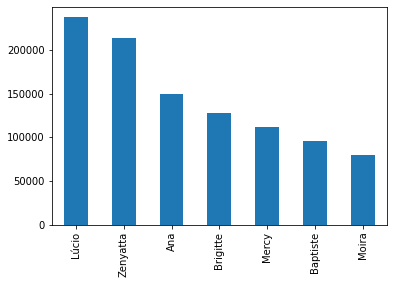

In [ ]:
df_s["hero"].value_counts().plot.bar()

In [ ]:
sns.boxplot()

### stat_name -> 열로

In [ ]:
df_s.describe()

,match_id,stat_amount
count,1.017428e+06,1.017428e+06
mean,2.323205e+04,9.478879e+02
std,9.096524e+03,2.352586e+03
min,1.022300e+04,-2.999977e+00
25%,2.031500e+04,4.000000e+00
50%,2.137000e+04,5.000000e+01
75%,3.308100e+04,5.970000e+02
max,3.738200e+04,4.547273e+04


In [ ]:
df_s_pivot = pd.pivot_table(df_s,                # 피벗할 데이터프레임
                     index = ['map_name','team', 'hero'],    # 행 위치에 들어갈 열
                     columns = 'stat_name',    # 열 위치에 들어갈 열
                     values = 'stat_amount',     # 데이터로 사용할 열
                     aggfunc = 'sum')

In [ ]:
df_avg_pivot = pd.pivot_table(df_s,                # 피벗할 데이터프레임
                     index = ['map_name','team', 'hero'],    # 행 위치에 들어갈 열
                     columns = 'stat_name',    # 열 위치에 들어갈 열
                     values = 'stat_amount',     # 데이터로 사용할 열
                     aggfunc = 'mean')
df_avg_pivot

stat_name                                          All Damage Done  ...  Weapon Accuracy
map_name              team               hero                       ...                 
Blizzard World        Atlanta Reign      Ana           2826.898581  ...         0.244775
                                         Baptiste      5394.567781  ...         0.236102
                                         Brigitte      5124.781720  ...              NaN
                                         Lúcio         9347.429592  ...         0.288024
                                         Mercy          100.000000  ...         0.263158
...                                                            ...  ...              ...
Watchpoint: Gibraltar Washington Justice Brigitte      6400.380520  ...              NaN
                                         Lúcio         4437.424582  ...         0.240120
                                         Mercy           57.847900  ...         0.600000
                                         Moira          953.518935  ...              NaN
                                         Zenyatta     12598.141322  ...         0.266428

[2902 rows x 133 columns]

In [ ]:
df_avg_pivot.fillna(0)

stat_name                                          All Damage Done  ...  Weapon Accuracy
map_name              team               hero                       ...                 
Blizzard World        Atlanta Reign      Ana           2826.898581  ...         0.244775
                                         Baptiste      5394.567781  ...         0.236102
                                         Brigitte      5124.781720  ...         0.000000
                                         Lúcio         9347.429592  ...         0.288024
                                         Mercy          100.000000  ...         0.263158
...                                                            ...  ...              ...
Watchpoint: Gibraltar Washington Justice Brigitte      6400.380520  ...         0.000000
                                         Lúcio         4437.424582  ...         0.240120
                                         Mercy           57.847900  ...         0.600000
                                         Moira          953.518935  ...         0.000000
                                         Zenyatta     12598.141322  ...         0.266428

[2902 rows x 133 columns]

In [ ]:
df_s_pivot.head()

stat_name                              All Damage Done  ...  Weapon Accuracy
map_name       team          hero                       ...                 
Blizzard World Atlanta Reign Ana           5653.797162  ...         0.489550
                             Baptiste     37761.974466  ...         1.652712
                             Brigitte     20499.126881  ...              NaN
                             Lúcio        37389.718369  ...         1.152097
                             Mercy          100.000000  ...         0.263158

[5 rows x 133 columns]

#### NAN 값 0 으로 채워 넣기

In [ ]:
df_s_pivot.fillna(0)

stat_name                                          All Damage Done  ...  Weapon Accuracy
map_name              team               hero                       ...                 
Blizzard World        Atlanta Reign      Ana           5653.797162  ...         0.489550
                                         Baptiste     37761.974466  ...         1.652712
                                         Brigitte     20499.126881  ...         0.000000
                                         Lúcio        37389.718369  ...         1.152097
                                         Mercy          100.000000  ...         0.263158
...                                                            ...  ...              ...
Watchpoint: Gibraltar Washington Justice Brigitte     51203.044156  ...         0.000000
                                         Lúcio        31061.972077  ...         1.680842
                                         Mercy           57.847900  ...         0.600000
                                         Moira         1907.037870  ...         0.000000
                                         Zenyatta     88186.989255  ...         1.864999

[2902 rows x 133 columns]

#### feature 목록 확인

In [ ]:
print(df_s_pivot.columns.values)

['All Damage Done' 'Amped Heal Activations' 'Amped Speed Activations'
 'Amplification Matrix Assists' 'Amplification Matrix Casts'
 'Amplification Matrix Efficiency' 'Armor - Rally' 'Armor - Repair Pack'
 'Armor Provided' 'Assists' 'Average Time Alive' 'Barrier Damage Done'
 'Biotic Grenade Kills' 'Biotic Launcher Healing Explosions'
 'Biotic Launcher Healing Shots' 'Biotic Orb Damage Efficiency'
 'Biotic Orb Healing Efficiency' 'Biotic Orb Maximum Damage'
 'Biotic Orb Maximum Healing' 'Blaster Kills' 'Coalescence Healing'
 'Coalescence Kills' 'Coalesence - Damage per Use'
 'Coalesence - Healing per Use' 'Critical Hit Accuracy'
 'Critical Hit Kills' 'Critical Hits' 'Damage - Biotic Grenade'
 'Damage - Biotic Orb' 'Damage - Coalescence' 'Damage - Discord Orb'
 'Damage - Quick Melee' 'Damage - Shield Bash' 'Damage - Weapon'
 'Damage - Weapon Charged' 'Damage - Weapon Pistol'
 'Damage - Weapon Primary' 'Damage - Weapon Scoped'
 'Damage - Weapon Secondary' 'Damage Amplified' 'Damage Blocke

In [ ]:
len(df_s_pivot.columns.values)

133

# EDA 진행

In [ ]:
df_s_pivot.dtypes

stat_name
All Damage Done                 float64
Amped Heal Activations          float64
Amped Speed Activations         float64
Amplification Matrix Assists    float64
Amplification Matrix Casts      float64
                                 ...   
Unscoped Accuracy               float64
Unscoped Hits                   float64
Unscoped Shots                  float64
Valkyrie Healing Efficiency     float64
Weapon Accuracy                 float64
Length: 133, dtype: object

In [ ]:
# sns.pairplot(df_s_pivot)

## sum pivot EDA

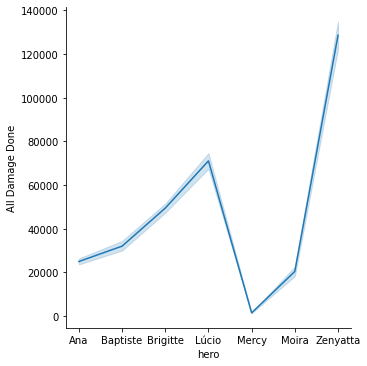

In [ ]:
sns.relplot(x="hero", y="All Damage Done", kind="line", data=df_s_pivot)

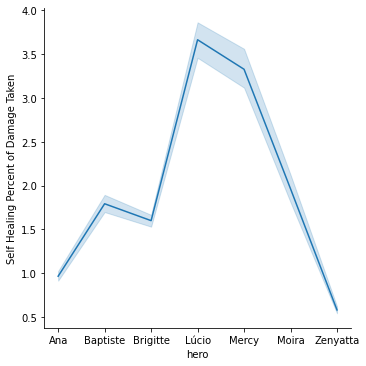

In [ ]:
sns.relplot(x="hero", y="Self Healing Percent of Damage Taken", kind="line", data=df_s_pivot)

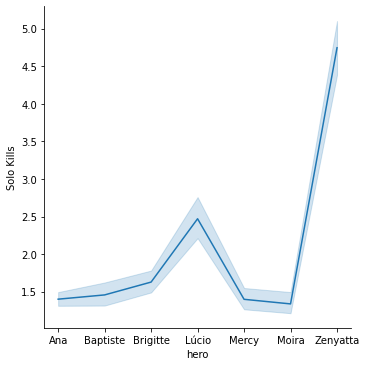

In [ ]:
sns.relplot(x="hero", y="Solo Kills", kind="line", data=df_s_pivot)

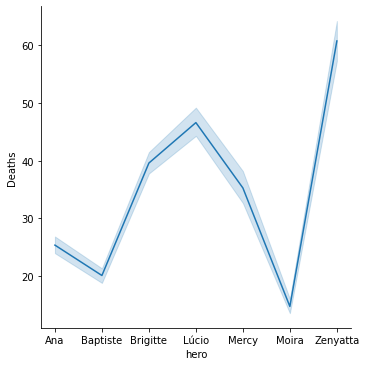

In [ ]:
sns.relplot(x="hero", y="Deaths", kind="line", data=df_s_pivot)

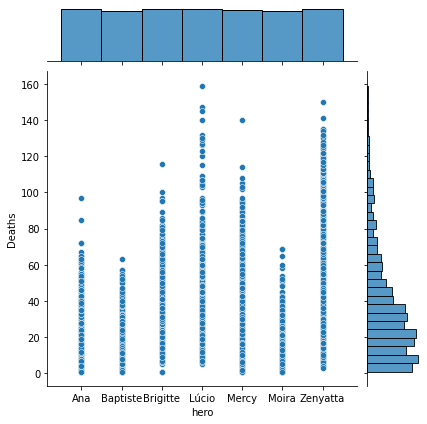

In [ ]:
sns.jointplot(x="hero", y="Deaths", data=df_s_pivot)

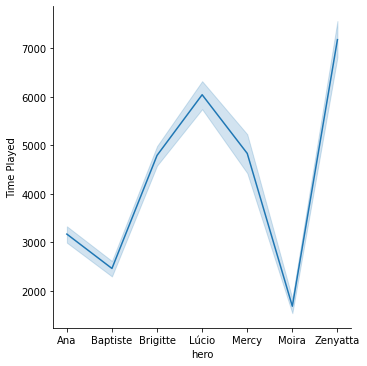

In [ ]:
sns.relplot(x="hero", y="Time Played", kind="line", data=df_s_pivot)

## 평균 pivot EDA

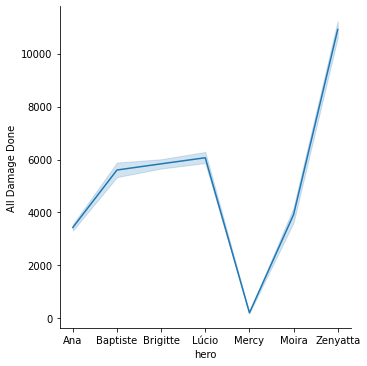

In [ ]:
sns.relplot(x="hero", y="All Damage Done", kind="line", data=df_avg_pivot)

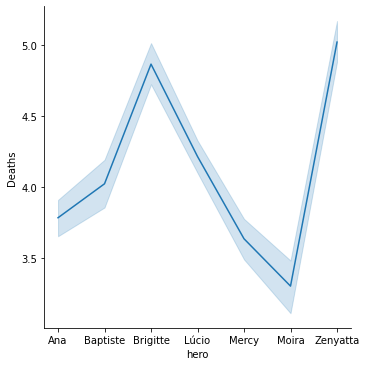

In [ ]:
sns.relplot(x="hero", y="Deaths", kind="line", data=df_avg_pivot)

AttributeError: ignored

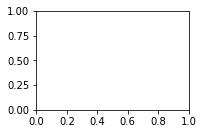

In [ ]:
plt.subplot(221)
